# Game App Monetisation Analysis

Folder Link: https://drive.google.com/drive/folders/150H4STmnpVoFDfYIiGB2-Dm-vXwxyaSg?usp=sharing

The dashboard for this analysis can be found here: https://public.tableau.com/views/GameMonetisationAnalysis/Dashboard1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")

In [2]:
event = pd.read_csv('events_us.csv', parse_dates=['event_datetime'],
                 infer_datetime_format=True)
user = pd.read_csv('user_source_us.csv', parse_dates=['event_date'],
                 infer_datetime_format=True)
ad = pd.read_csv('ad_costs_us.csv', parse_dates=['day'],
                 infer_datetime_format=True)

In [3]:
def data_info(data):
    """This function helps simplify reading multiple datasets.
    
    This function takes the dataset variable as input and 
    produces the general information about each dataset, 
    including description, duplicates and missing values."""
    print('General dataset information:')
    print(data.info())
    print()
    print('First five rows:')
    print(data.head())
    print()
    print('Description of the dataset:')
    print(data.describe())
    print()
    print('This dataset has {} duplicates.'.format(data.duplicated().sum()))
    print()
    print('How many missing values does this data have?')
    print(data.isna().sum())
    print()
    print('What is the percentage of the missing values?')
    print(data.isna().sum() / len(data))

## Introduction
<a name="introduction"></a>

Three datasets have been provided from a game app developer called "Space Brothers" for analysis. The goal of this analysis is to provide a suitable monetisation model that balances players experience and profit for the developers.
The first dataset contains events in the app, specifically users in the first stage of the game. The other two contains data related to advertising activity.

This report will consist of the following:

1. General information on the dataset
2. Data preprocessing stages, removing duplicates, categorising data and adding other relevant variables
3. Exploratory data analysis on the differences between users who pass stage 1 by defeating the enemy or building a satellite orbital system, period of finishing stage 1, number of events for users who don't pass stage 1 and daily events.
4. Further analysis on stage 1 completion between enemy and project users.
5. Statistical testing of the average days it takes to complete stage 1.

Based on the conclusions drawn in this report, Space Brothers developers and executives will understand:

1. The differences of usage behaviour between those who are shown ads and those who aren't.
2. Whether showing ads is a suitable monetisation model.

### Table of contents
1. [Introduction](#introduction)
2. [Data Preprocessing](#dpp)
3. [Exploratory Data Analysis](#eda)
4. [Statistical Significance Testing](#sst)
5. [Conclusion](#cons)

In [4]:
data_info(event)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   127957 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB
None

First five rows:
       event_datetime     event  building_type  \
0 2020-05-04 00:00:01  building  assembly_shop   
1 2020-05-04 00:00:03  building  assembly_shop   
2 2020-05-04 00:00:16  building  assembly_shop   
3 2020-05-04 00:00:16  building  assembly_shop   
4 2020-05-04 00:00:35  building  assembly_shop   

                                user_id project_type  
0  55e92310-cb8e-4754-b622-597e124b03de          NaN

The event dataset has 135640 rows, each an event from users. There are more than 13,000 unique users. There are some columns that have substantial amount of missing values, for example project_type, that has 98% missing values. 

In [5]:
data_info(user)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     13576 non-null  object        
 1   event_date  13576 non-null  datetime64[ns]
 2   source      13576 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 318.3+ KB
None

First five rows:
                                user_id event_date                   source
0  0001f83c-c6ac-4621-b7f0-8a28b283ac30 2020-05-06             facebook_ads
1  00151b4f-ba38-44a8-a650-d7cf130a0105 2020-05-06          google_play_ads
2  001aaea6-3d14-43f1-8ca8-7f48820f17aa 2020-05-05  youtube_channel_network
3  001d39dc-366c-4021-9604-6a3b9ff01e25 2020-05-05    instagram_new_adverts
4  002f508f-67b6-479f-814b-b05f00d4e995 2020-05-05             facebook_ads

Description of the dataset:
                                     user_id          

The user source dataset has 13576 rows, each row contains user ID, date and the source the user who downloaded the app came from. The dataset does not have any missing values or duplicates.

In [6]:
data_info(ad)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes
None

First five rows:
         source        day        cost
0  facebook_ads 2020-05-03  935.882786
1  facebook_ads 2020-05-04  548.354480
2  facebook_ads 2020-05-05  260.185754
3  facebook_ads 2020-05-06  177.982200
4  facebook_ads 2020-05-07  111.766796

Description of the dataset:
             cost
count   28.000000
mean   271.556321
std    286.867650
min     23.314669
25%     66.747365
50%    160.056443
75%    349.034473
max    969.139394

This dataset has 0 duplicates.

How many missing values does this data have?
source    0
day       0
cost      0
dtype: int6

The advertisement dataset has 28 rows, each contains information about user clicks on the ad for the first time. This dataset does not contain any missing values or duplicates.

### Conclusion

1. Most of the data is in the event dataset, it has some missing values and duplicates that we need to process before moving to the analysis.
2. The other datasets are mostly advertising activity, they don't have any missing values or duplicates.

## Data Preprocessing
<a name="dpp"></a>

### Duplicates

Based on the previous conclusions and findings, we would preprocess the datasets in this section. We would start by checking the one duplicated row.

In [7]:
event[event.duplicated()]

,event_datetime,event,building_type,user_id,project_type
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


Since this is due to datetime, it might be because of a bug in the data entry system. We can remove this one as it would not affect the dataset.

In [8]:
event = event.drop_duplicates()

In [9]:
event.duplicated().sum()

0

Now that the duplicated row is dropped. We will move forward with processing the missing values.

### Missing Values

In [10]:
event.loc[event['building_type'].isnull()].head()

,event_datetime,event,building_type,user_id,project_type
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN


From the first glance, it looks like the missing values in building_type is due to the users choosing not to construct a building but defeating the enemy. To be sure, let's group the event number based on building type.

In [11]:
event.groupby('event')['building_type'].count()

event
building            127956
finished_stage_1         0
project                  0
Name: building_type, dtype: int64

In [12]:
event['building_type'].value_counts()

spaceport          59325
assembly_shop      54494
research_center    14137
Name: building_type, dtype: int64

Based on the numbers, there are also some users that implemented a project but not yet finished, it may be good to check them first before making any conclusion and filling up the missing values. So we will proceed with checking the project type.

In [13]:
event['project_type'].value_counts()

satellite_orbital_assembly    1866
Name: project_type, dtype: int64

In [14]:
event.loc[event['project_type'] == 'satellite_orbital_assembly'].head()

,event_datetime,event,building_type,user_id,project_type
47121,2020-05-08 18:10:25,project,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly
57398,2020-05-09 13:49:11,project,NaN,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly
58797,2020-05-09 16:19:33,project,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly
61174,2020-05-09 20:29:01,project,NaN,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly
63770,2020-05-10 00:57:47,project,NaN,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly


The project_type 'satellite_orbital_assembly' has NaN values on building_type. The task mentioned that to reach the second stage, they need to do one of the following:

- Defeat the first boss
- Build an orbital satellite-assembly system

So we can infer that satellite_orbital_assembly is also a building type, let's include that in the building type.

In [15]:
event.loc[(event['project_type'] == 'satellite_orbital_assembly') & (event['building_type'].isnull()), 'building_type'] = 'satellite_orbital'

In [16]:
event['building_type'].value_counts()

spaceport            59325
assembly_shop        54494
research_center      14137
satellite_orbital     1866
Name: building_type, dtype: int64

In [17]:
event.loc[(event['event'] == 'project') & (event['building_type'].isnull())]

,event_datetime,event,building_type,user_id,project_type


Now, it seems like the rest of the building_type is empty because users are finishing stage 1 by defeating the enemy, so we can fill them with 'NA' (Not Applicable)

In [18]:
event['building_type'] = event['building_type'].fillna('NA')

In [19]:
event['building_type'].isnull().sum()

0

We have filled in building_type, now we can inspect project_type. We should be careful as there is a huge amount of missing values in this column. If it's not necessary, we may just leave it be as it may skew the dataset.

In [20]:
event.loc[event['project_type'].isnull()]['building_type'].value_counts()

spaceport          59325
assembly_shop      54494
research_center    14137
NA                  5817
Name: building_type, dtype: int64

It seems like the missing values in the project_type column is because the users are constructing something that is not the goal of the game (i.e. orbital satellite-assembly system), we should just leave them be for now.

### Additional Column

In [21]:
event['date'] = event['event_datetime'].dt.date

### Conclusion

1. We have removed 1 duplicate in the event dataset.
2. We have filled in the missing values in the building_type column with appropriate values. The users who complete the stage 1 by building the satellite orbital system is registered as "project" event, so the building type is missing. Those missing values also include those who completed stage 1 by defeating the enemy.
3. We left project type missing values as it is because there's so many of them and we haven't needed the column at the moment. 

## Exploratory Data Analysis
<a name="eda"></a>

In this section we would explore the following:
1. The number of users who finished stage 1 by building satellite orbital system or defeating the enemy.
2. The length of time that users take to finish stage 1 of the game.
3. The number of users who did not finish stage 1.
4. The number of events based on dates.

### Building Satellite Orbital System vs Defeating Enemy

In [22]:
event['event'].value_counts()

building            127956
finished_stage_1      5817
project               1866
Name: event, dtype: int64

Now we are going to take a look which users have finished stage 1.

In [23]:
finished = event.query('event == "finished_stage_1"')
finished_users = event[event['user_id'].isin(finished['user_id'])]

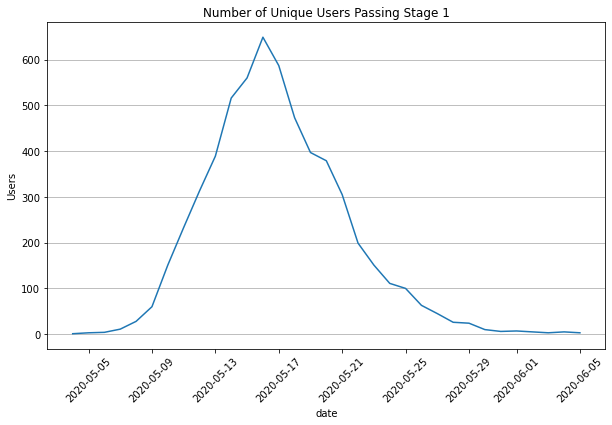

In [24]:
finished_by_date = finished.groupby('date')['user_id'].nunique()
finished_by_date.columns = ['n_users']

finished_by_date.plot(figsize=(10,6))
plt.title('Number of Unique Users Passing Stage 1')
plt.ylabel('Users')
plt.grid(axis='y')
plt.xticks(rotation=45);

Based on the graph above, the number of users finishing the stage 1 are increasing steadily until it hits the peak around May 15 with more than 600 users, before decreasing until it's back close to zero on May 29.

In [25]:
finished_users['event'].value_counts()

building            60786
finished_stage_1     5817
project              1866
Name: event, dtype: int64

From users who have finished, in total there are 5817 users, all of them go through building stage more than 60,000 times and project 1866 times. We will find understand more about this by choosing one user.

In [26]:
event[event['user_id'] == 'c07b1c10-f477-44dc-81dc-ec82254b1347']

,event_datetime,event,building_type,user_id,project_type,date
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04
27085,2020-05-06 23:49:25,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-06
28866,2020-05-07 03:56:30,building,spaceport,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-07
30712,2020-05-07 07:58:20,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-07
30946,2020-05-07 08:30:13,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-07
55068,2020-05-09 09:30:40,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-09
64546,2020-05-10 02:18:34,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-10
86329,2020-05-11 23:16:25,building,research_center,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-11
88075,2020-05-12 04:26:44,building,research_center,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-12
96373,2020-05-13 05:45:37,building,spaceport,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-13


The user above have more than 13 events. He tried building various buildings and eventually finished stage 1 around 11 days after he first started the game.

In [27]:
finished_users[finished_users['event'] == 'building']['building_type'].value_counts()

spaceport          27920
assembly_shop      25414
research_center     7452
Name: building_type, dtype: int64

Out of 60,786 events from 5817 users, nearly 28,000 events are building spaceport, more than 25000 are building assembly shop and nearly 7500 are building research centre. Even though users can only pass the first stage by building satellite orbital system.

The big number of events in building, compared to the amount of users who eventually passed the first stage, indicates that most users try out different methods before finally passing the first stage. Now let's take a look only at users who passed by defeating the enemy.

Since users can only pass either by doing the satellite orbital assembly project or defeating enemy, we can deduct the finished users by those who passed by project, the remaining users would pass by defeating enemy.

In [28]:
project_users = finished_users.loc[finished_users['event'] == 'project']['user_id']
project = finished_users[finished_users['user_id'].isin(project_users)]

In [29]:
enemy = finished_users[~finished_users['user_id'].isin(project_users)]

<div class="alert alert-block alert-info">
<b>Author's comment.</b> For this I got it from here 
<a>https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql</a> <a class="tocSkip"></a>
</div>

In [30]:
enemy[enemy['user_id'] == "515c1952-99aa-4bca-a7ea-d0449eb5385a"]

,event_datetime,event,building_type,user_id,project_type,date
30473,2020-05-07 07:28:50,building,assembly_shop,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-05-07
47075,2020-05-08 18:05:14,building,spaceport,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-05-08
67618,2020-05-10 07:21:23,building,assembly_shop,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-05-10
89125,2020-05-12 07:42:12,building,spaceport,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-05-12
126662,2020-05-18 22:33:29,building,spaceport,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-05-18
130929,2020-05-20 23:27:00,building,spaceport,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-05-20
133040,2020-05-22 16:45:30,building,spaceport,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-05-22
134327,2020-05-24 15:52:46,building,spaceport,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-05-24
135159,2020-05-27 04:23:44,building,spaceport,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-05-27
135441,2020-05-29 02:59:03,building,spaceport,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-05-29


The user example above, also had 13 events, building various buildings until eventually passing nearly a month after they started the game. 

In [31]:
enemy['event'].value_counts()

building            37185
finished_stage_1     3951
Name: event, dtype: int64

In [32]:
enemy['building_type'].value_counts()

spaceport          17132
assembly_shop      16298
NA                  3951
research_center     3755
Name: building_type, dtype: int64

There are 3951 users who pass the first stage by defeating the enemy. They also in total had nearly 40000 building events, most of them building spaceport and assembly shop. Then we can take a look at events and building type of those users who completed the first stage by doing a project.

In [33]:
project['event'].value_counts()

building            23601
finished_stage_1     1866
project              1866
Name: event, dtype: int64

In [34]:
project['building_type'].value_counts()

spaceport            10788
assembly_shop         9116
research_center       3697
NA                    1866
satellite_orbital     1866
Name: building_type, dtype: int64

Out of 1866 users who passed by constructing a project, they had more than 23000 building events, consisting of mostly building a spaceport, followed closely by assembly shop. Let's see how the two groups compare on their number of events.

### Game Timeline

On the example of two users above, one user took 11 days and the other user took nearly a month before finally passing the first stage. In this section we would look further at how long does each user take to finish the first stage.

In [35]:
first_event = event.groupby('user_id')['event_datetime'].min().reset_index()
first_event.columns = ['user_id', 'first_event']

In [36]:
event = event.merge(first_event, on='user_id', how='left')

In [37]:
event['days_since_first'] = event['event_datetime'] - event['first_event']

In [38]:
event['days_since_first'] = event['days_since_first'] / np.timedelta64(1, 'D')
event['days_since_first'] = event['days_since_first'].astype(int)

We can now divide the length of period that each users take on each event based on 7-day period.

<div class="alert alert-block alert-info">
<b>Author's comment.</b> I learned how to do the cut method from here
<a>https://stackoverflow.com/questions/45751390/pandas-how-to-use-pd-cut</a> <a class="tocSkip"></a>
</div> 

In [40]:
bins = [0, 7, 14, 28, 30]
labels = ["one","two","three", "three+"]

event['week'] = pd.cut(event['days_since_first'], bins=bins, labels=labels)

In [41]:
event['week'] = event['week'].astype(object)

In [42]:
event['week'] = event['week'].fillna('same day')

In [43]:
(event
 .groupby(['week', 'event'])
 .agg({'user_id': 'nunique'})
 .sort_values('user_id')
 .reset_index()
)

,week,event,user_id
0,same day,finished_stage_1,4
1,three+,building,5
2,three+,finished_stage_1,7
3,one,project,224
4,three,project,344
5,one,finished_stage_1,951
6,three,finished_stage_1,1171
7,two,project,1298
8,three,building,1779
9,two,finished_stage_1,3684


From the table above, we found that:
- There are 4 users who finished on the same day as they started the game. 
- Most users finish by the third week since they start the game.
- There are 5 users still building more than three weeks since they started.
- The amount of users building decreases over time.
- The amount of users doing a project increases significantly on the second week, but decreases again on the third.
- No users do a project more than 3 weeks.

In [44]:
enemy_user = event[event['user_id'].isin(enemy['user_id'])]
project_user = event[event['user_id'].isin(project['user_id'])]

In [45]:
enemy_user[enemy_user['event'] == 'finished_stage_1']['week'].value_counts()

two         2421
one          897
three        623
three+         6
same day       4
Name: week, dtype: int64

For users who passed the first stage by defeating the enemy, more than 2400 of them passed on the 2nd week since the started playing.

In [46]:
project_user[project_user['event'] == 'finished_stage_1']['week'].value_counts()

two       1263
three      548
one         54
three+       1
Name: week, dtype: int64

Similar result shows on users who passed by constructing a project, most of them also passed on the 2nd week. Although there are less project users who passed on the first week rather than the enemy users. This might mean either constructing satellite assembly system is harder than defeating the enemy OR the ads shown make them finish slower. We will take a look further in later stage of the analysis.

### Non-Completion of Stage 1

We have looked into the users who passed stage 1, it will be good to take a look at those who did not complete stage 1 to see if there's any possible reason.

In [47]:
not_finished = event[~event['user_id'].isin(finished['user_id'])]
not_finished.head()

,event_datetime,event,building_type,user_id,project_type,date,first_event,days_since_first,week
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04 00:00:01,0,same day
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,2020-05-04 00:00:16,0,same day
5,2020-05-04 00:00:36,building,assembly_shop,06c592ca-902d-42bb-bac3-75ce84cca159,NaN,2020-05-04,2020-05-04 00:00:36,0,same day
7,2020-05-04 00:00:38,building,assembly_shop,beb8ca15-33a9-465d-b47b-89aa96f89c9a,NaN,2020-05-04,2020-05-04 00:00:38,0,same day
10,2020-05-04 00:01:59,building,assembly_shop,c99ecd61-1a4e-4bd2-b8b5-1f8bbcd2bdb5,NaN,2020-05-04,2020-05-04 00:01:59,0,same day


In [48]:
not_finished['user_id'].nunique()

7759

There are 7759 users who did not pass stage 1. Let's check what they are doing.

In [49]:
not_finished['event'].value_counts()

building    67170
Name: event, dtype: int64

In [50]:
not_finished['building_type'].value_counts()

spaceport          31405
assembly_shop      29080
research_center     6685
Name: building_type, dtype: int64

All users only have building events, in total there are 67170 building events. More than half of those events are building spaceport, followed by assembly shop. 

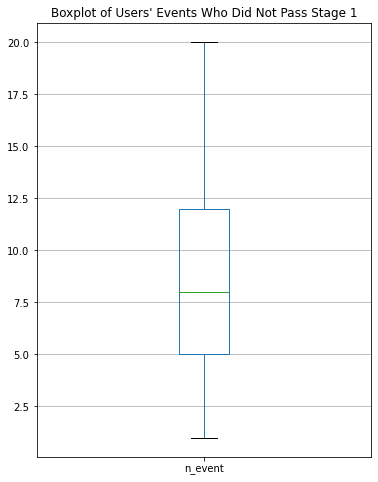

In [51]:
not_finished_event = not_finished.groupby('user_id')['event'].count().reset_index()
not_finished_event.columns = ['user_id', 'n_event']

not_finished_event.plot(kind='box', figsize=(6,8))
plt.title("Boxplot of Users' Events Who Did Not Pass Stage 1")
plt.grid(axis='y')
plt.xticks([1]);

As we can see on the boxplot, most users have between 5-12 events, with a median of 7.5 events. The upper quartile goes up to 20 events per user, but there's no outlier.

In [52]:
not_finished['days_since_first'].describe()

count    67170.000000
mean         4.667947
std          4.139899
min          0.000000
25%          1.000000
50%          4.000000
75%          7.000000
max         29.000000
Name: days_since_first, dtype: float64

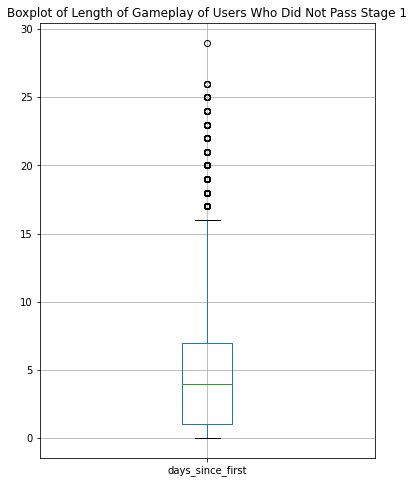

In [54]:
not_finished['days_since_first'].plot(kind='box', figsize=(6,8))
plt.title("Boxplot of Length of Gameplay of Users Who Did Not Pass Stage 1")
plt.grid()
plt.xticks([1]);

Based on the table and the boxplot, we can see that most users who didn't complete stage 1 play only for less than 5 days. The Q3 is only 7 days, although there are many outliers up to 29 days. It may not be needed for now, but it's good to check how many outliers are there and whether removing them would skew the analysis.

In [57]:
len(not_finished[not_finished['days_since_first'] > 16]) / len(not_finished)

0.011969629298794105

The outliers only make up 1.2% of the total users who did not finish the dataset. We can leave them be for now and if needed later, we will filter them out of the dataset.

### Event Based on Dates

In [59]:
print('The first event in the event dataset is:', event['event_datetime'].min())
print('The last event in the event dataset is:', event['event_datetime'].max())

The first event in the event dataset is: 2020-05-04 00:00:01
The last event in the event dataset is: 2020-06-05 12:32:49


The dataset contains events for 31 days from May 4 to June 6. Let's see how are the user activities on each day.

In [60]:
daily_event = event.groupby('date')['event'].count().reset_index()
daily_event.columns = ['date', 'total_event']

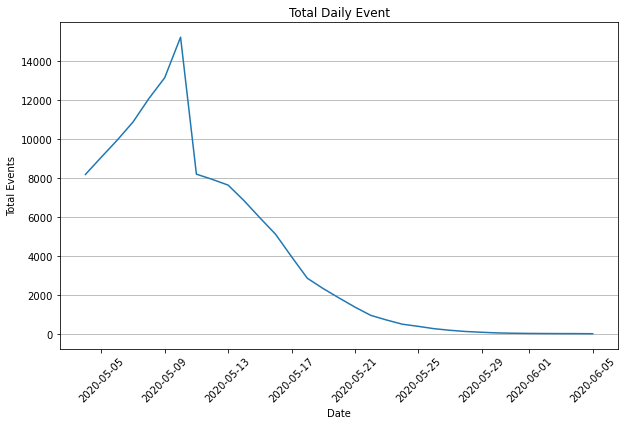

In [69]:
daily_event.plot(kind='line', x='date', y='total_event', figsize=(10, 6), legend=False)

plt.title("Total Daily Event")
plt.xlabel('Date')
plt.ylabel('Total Events')
plt.grid(axis='y')
plt.xticks(rotation=45);

Based on the graph above, we can see that there's a peak on the 6th day since the data entry starts, before having a significant decrease the day after. Afterwards the daily event continues to decrease until the all time low in the 25th day onwards.

In [62]:
user.groupby('event_date')['user_id'].nunique().reset_index()

,event_date,user_id
0,2020-05-04,5860
1,2020-05-05,3361
2,2020-05-06,1847
3,2020-05-07,1109
4,2020-05-08,688
5,2020-05-09,440
6,2020-05-10,271


The increase on activities above might coincide with the user advertisement, we can see that the user ads are running from May 4-10, during those dates the events are consistently above 8000 events.

In [63]:
user_daily_event = (event
                    .groupby('date')
                    .agg({'user_id': ['count', 'nunique']})
                    .reset_index()
                    )

user_daily_event.columns = ['date', 'n_sessions', 'n_users']

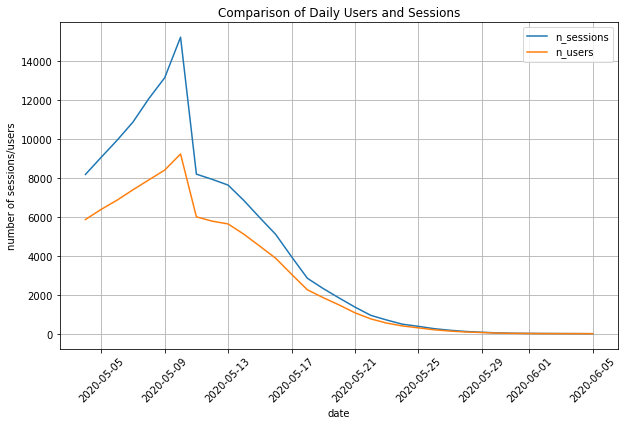

In [76]:
user_daily_event.plot(kind='line',
                      x='date',
                      y=['n_sessions', 'n_users'],
                      figsize=(10,6))

plt.title("Comparison of Daily Users and Sessions")
plt.xlabel('date')
plt.ylabel('number of sessions/users')
plt.xticks(rotation=45)
plt.grid();

The users and sessions are pretty similar, they increase until the 6th day then decrease significantly on 7th day, then steadily decreases until the end of the experiment. The spike in unique users caused higher spike of session on that day.

### Conclusion

1. Most users try out different methods before finally passing the first stage.
2. There are more users who finished the game by defeating the enemy than those building a project.
3. Both enemy and project users mostly finish the game by the second week, although there are less project users who passed on the first week rather than the enemy users. This might mean either constructing satellite assembly system is harder than defeating the enemy OR the ads shown make them finish slower.
4. The users daily events show that the ads for the app is working, there is an increase of event up until the ad finished on the 6th day.

## Completion Rate Analysis

Although the basic monetization of the game is still in the planning stages, it is expected that the app will show ads on the screen where the user selects the type of objects to be constructed. In this section, we will see if the presence of ads affect user's experience in the game, which may be indicated by:
- lower number of users to complete stage 1
- slower progress towards completion of stage 1

In [77]:
print('The amount of users who passed the first stage by constructing a building is:', project_user['user_id'].nunique())
print('The completion rate for the project building is: {:.2%}'.format(project_user['user_id'].nunique() / event['user_id'].nunique()))
print()
print('The amount of users who passed the first stage by defeating the enemy is:', enemy_user['user_id'].nunique())
print('The completion rate for defeating enemy is: {:.2%}'.format(enemy_user['user_id'].nunique() / event['user_id'].nunique()))

The amount of users who passed the first stage by constructing a building is: 1866
The completion rate for the project building is: 13.74%

The amount of users who passed the first stage by defeating the enemy is: 3951
The completion rate for defeating enemy is: 29.10%


Based on the unique users above, we can see that there are more users who opt to defeat the enemy. Nearly 30% of users passed the first stage by defeating the enemy, while the users who build satellite orbital system is a bit less than 14%. Let's take a look how the number looks like based on date. 

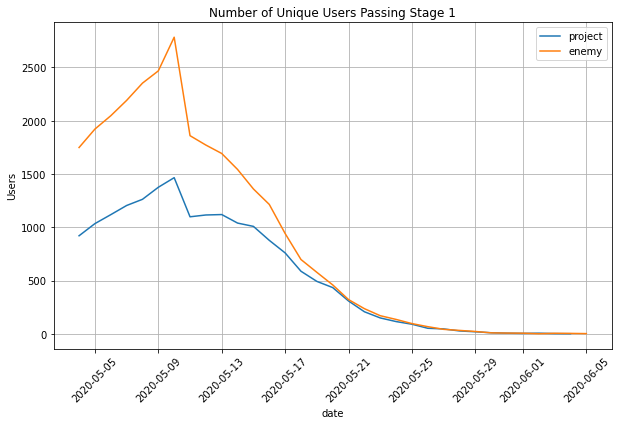

In [79]:
project_user.groupby('date')['user_id'].nunique().plot(figsize=(10,6), label='project')
enemy_user.groupby('date')['user_id'].nunique().plot(figsize=(10,6), label='enemy')

plt.title('Number of Unique Users Passing Stage 1')
plt.ylabel('Users')
plt.legend()
plt.xticks(rotation=45)
plt.grid();

Based on the graph above, both the project and enemy users show similar trajectory. Although enemy users has steeper spike on May 10, around May 20 the line converges as they decrease toward the end of the experiment.

In [80]:
project_event = project_user.groupby('user_id')['event'].count().reset_index()
project_event.columns = ['user_id', 'n_events']

enemy_event = enemy_user.groupby('user_id')['event'].count().reset_index()
enemy_event.columns = ['user_id', 'n_events']

In [81]:
project_event['n_events'].describe()

count    1866.000000
mean       14.647910
std         2.162522
min        12.000000
25%        13.000000
50%        14.000000
75%        16.000000
max        22.000000
Name: n_events, dtype: float64

In [82]:
enemy_event['n_events'].describe()

count    3951.000000
mean       10.411541
std         3.059529
min         3.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        20.000000
Name: n_events, dtype: float64

Users who defeat the enemy has lesser events than those who construct a building. On average, each user who passes the first stage by constructing a building has 15 events while those who defeat the enemy has 10 events. Let's plot this to see more clearly.

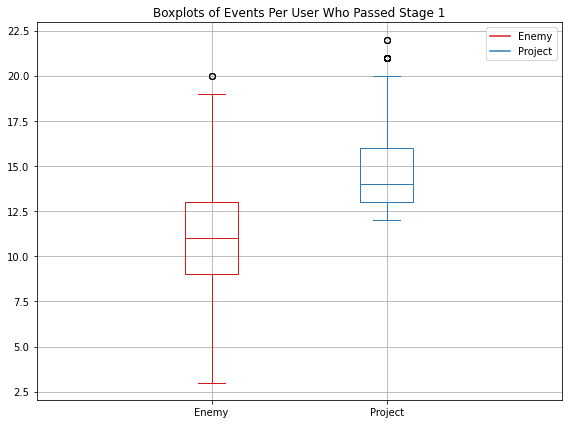

In [85]:
data_a = enemy_event['n_events']
data_b = project_event['n_events']

ticks = ['Enemy', 'Project']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(8,6))

bpl = plt.boxplot(data_a, positions=[0], widths = 0.6)
bpr = plt.boxplot(data_b, positions=[2], widths = 0.6)
set_box_color(bpl, '#D7191C')
set_box_color(bpr, '#2C7BB6')

plt.plot([], c='#D7191C', label='Enemy')
plt.plot([], c='#2C7BB6', label='Project')
plt.legend()

plt.title('Boxplots of Events Per User Who Passed Stage 1')
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.grid()
plt.tight_layout();

<div class="alert alert-block alert-info">
<b>Author's comment.</b> I learned how to stack boxplots from here
<a>https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots</a> <a class="tocSkip"></a>
</div>

Based on the boxplots above, we can see that events per user for those who passed by doing a project are significantly higher than those who passed by defeating the enemy. The lower quartile of project users is higher than the median of enemy users. The Q1 of project users are on similar level as the Q3 of enemy users. This shows that most project users have to do a lot more events before passing stage 1, compared to enemy users. If we look back to the boxplot of users who didn't pass stage 1, the events they did is lower than the project users.

There are several possible explanations about this:
- users who didn't pass stage 1 don't have the patient to eventually find the right building and finish it
- constructing a building is more difficult, so users have to come back multiple times to pass the first stage
- users got distracted by the ads shown when they choose the building, so they didn't get to finish the game
- constructing a building is more enjoyable, so users come back multiple times as they enjoy the process

Out of these explanations, only the 4th explanation would justify the current monetisation model plan of showing ads to those constructing a building. There could be other possible explanations from other departments in the gaming company that we may not be aware yet, such as marketing efforts (push and email notifications for users who haven't completed the game yet), in which case such justification could be challenged.

## Statistical Significance Testing
<a name="sst"></a>

### Average Days of Finishing Stage 1

1. Null and Alternative Hypotheses

H0: The means of two statistical populations are equal. In this case it means that the average days it take to complete stage 1 of those who are shown ads is the same as those who aren't.

H1: The means of two statistical populations are not equal. In this case it means that the average days it take to complete stage 1 of those who are shown ads is not the same as those who aren't.

2. Criteria for a decision (alpha value)

In behavioral science, the level of significance is typically set at 5% and we will choose this criteria as well. When the probability of obtaining a sample mean is less than 5% if the null hypothesis were true, then we reject the value stated in the null hypothesis.

3. Calculate the t-test

In order to test our hypothesis that the means of two statistical populations are equal based on samples taken from them, we will apply the method scipy.stats.ttest_ind().

The method takes the following parameters:

- array1, array2 are arrays containing the samples. We will use the days_since_first column for event occurence of finished_stage_1 on both groups.
- equal_var is an optional parameter that specifies whether or not the variances of the populations should be considered equal.

In [86]:
finished_enemy = enemy_user.query('event == "finished_stage_1"')
finished_project = project_user.query('event == "finished_stage_1"')

In [89]:
print('Enemy User Finishing Period Description')
print(finished_enemy['days_since_first'].describe())
print()
print('Project User Finishing Period Description')
print(finished_project['days_since_first'].describe())

Enemy User Finishing Period Description
count    3951.000000
mean       10.606176
std         4.106099
min         0.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        30.000000
Name: days_since_first, dtype: float64

Project User Finishing Period Description
count    1866.000000
mean       12.963023
std         3.526723
min         5.000000
25%        10.000000
50%        13.000000
75%        15.000000
max        29.000000
Name: days_since_first, dtype: float64


Based on the description above, the two groups don't seem to have a significant difference, let's test it just to be sure.

In [88]:
st.levene(finished_enemy['days_since_first'], finished_project['days_since_first'])

LeveneResult(statistic=36.45892228838066, pvalue=1.6555914307834046e-09)

The p-value suggests that the populations do not have equal variance. Therefore we will set equal_var to False.

<div class="alert alert-block alert-info">
<b>Author's comment.</b> I learned about the equal variance testing here
<a>https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/</a> <a class="tocSkip"></a>
</div>


In [94]:
alpha = 0.05

results = st.ttest_ind(finished_enemy['days_since_first'], finished_project['days_since_first'], equal_var=False)

print('p-value:',results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypotheses. Enemy and Project users' average days of finishing stage 1 are different.")
else:
    print("We retain the null hypotheses. Enemy and Project users' average days of finishing stage 1 are the same.")

p-value: 2.6237027268064204e-106
We reject the null hypotheses. Enemy and Project users' average days of finishing stage 1 are different.


Based on the p-value, the average days needed for users to finish stage 1 between the two methods are different. We will plot them on a histogram below to get a clearer view.

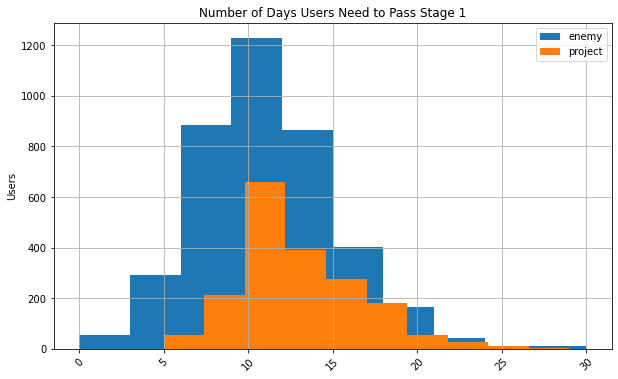

In [95]:
finished_enemy['days_since_first'].plot(kind='hist', figsize=(10,6), label='enemy')
finished_project['days_since_first'].plot(kind='hist', figsize=(10,6), label='project')

plt.title('Number of Days Users Need to Pass Stage 1')
plt.ylabel('Users')
plt.legend()
plt.xticks(rotation=45)
plt.grid();

Based on the histogram, we can see that the distribution for enemy users are more normal, with a peak around day 10. While The project users are more positively skewed, although the peak is pretty much the same as the enemy users.

## Overall Conclusion
<a name="cons"></a>

1. We have inspected three datasets for this report:
- event dataset contains data about user events in the game app
- user and ad dataset contains data about advertising activities
2. We have preprocessed the event dataset prior to analysis by removing duplicates, filling in missing values and adding relevant columns
3. Through the exploratory data analysis, we found that:
- most users try out different methods before finally passing the first stage, this is reflected in the high number of building events.
- there are higher amount of users who finished the game by defeating the enemy than those building a project, these enemy users finish faster too. This might indicate the difficulty of constructing buildings or the distraction of having been shown advertisement during gameplay.
- the users who didn't pass stage 1 play for much shorter time than those who did, with the average of only less than 5 days.
- the users daily events show that the ads for the app is working, there is an increase of event up until the ad finished on the 6th day.
4. We found that the completion rate of enemy users is twice higher than the project users, and the project users have to do a lot more events than the enemy users. We might need to do further survey whether the users do this because the gameplay of constructing a building is more enjoyable than defeating enemy, or they do it because constructing the building is too difficult/distracting with the ads shown.
5. We found through significance testing that the average number of days for finishing stage 1 between enemy and project users are different.

Recommendations:
- Conduct a survey for users who are constructing buildings whether the gameplay is too difficult.
- Build another monetisation model that doesn't involve advertisement during gameplay, instead showing advertisement at the start of the app, for example.